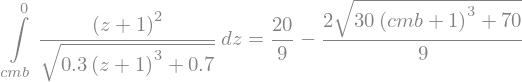

In [2]:
import sympy as sp

# Define variables
z, cmb = sp.symbols('z cmb', real=True)
A, B = sp.symbols('A B', positive=True)

# Define integrand and parameters (as exact rationals)
A_val, B_val = sp.Rational(3,10), sp.Rational(7,10)
integrand = (1+z)**2 / sp.sqrt(A_val*(1+z)**3 + B_val)

# Compute definite integral symbolically
I_def = sp.simplify(sp.integrate(integrand, (z, cmb, 0)))

# Pretty printing setup
sp.init_printing()

# Print the equation in formatted math form
display(sp.Eq(
    sp.Integral((1+z)**2 / sp.sqrt(0.3*(1+z)**3 + 0.7), (z, cmb, 0)),
    I_def
))




$\displaystyle \frac{20}{9} - \frac{2 \sqrt{30 \left(cmb + 1\right)^{3} + 70}}{9}$

In [4]:
import sympy as sp

# Define variables
z, cmb = sp.symbols('z cmb', real=True)
A_val, B_val = sp.Rational(3,10), sp.Rational(7,10)

# Define the integrand
integrand = (1+z)**2 / sp.sqrt(A_val*(1+z)**3 + B_val)

# Compute definite integral symbolically
I_def = sp.simplify(sp.integrate(integrand, (z, cmb, 0)))

# Define the integral expression symbolically for display
integral_expr = sp.Integral((1+z)**2 / sp.sqrt(0.3*(1+z)**3 + 0.7), (z, cmb, 0))

# Create the equation
equation = sp.Eq(integral_expr, I_def)

# Generate LaTeX string
latex_str = sp.latex(equation)

# Print LaTeX output
print(latex_str)


\int\limits_{cmb}^{0} \frac{\left(z + 1\right)^{2}}{\sqrt{0.3 \left(z + 1\right)^{3} + 0.7}}\, dz = \frac{20}{9} - \frac{2 \sqrt{30 \left(cmb + 1\right)^{3} + 70}}{9}


In [5]:
from astropy.cosmology import Planck18

# H_0 in km/s/Mpc
H0 = Planck18.H0
print(f"H_0 = {H0:.2f}")


H_0 = 67.66 km / (Mpc s)


In [22]:
import astropy.units as u
from astropy.cosmology import Planck18 as cosmo
import numpy as np

X_e = 0.8
cn_sigma = 5e-21 * 1/u.s
numerical_factor = 20/9
H0 = cosmo.H0.to(1/u.s)  # <-- convert H0 to s^-1 explicitly

z = np.linspace(0, 20, 1000)

tau = - (X_e * cn_sigma / H0) * numerical_factor * (1 - np.sqrt(0.3*(1 + z)**3 + 0.7))


print(f"tau(z=10) = {tau[np.argmin(np.abs(z-10))]:.3e}")


tau(z=10) = 7.691e-02


In [18]:
cn_sigma /H0

<Quantity 0.00228028 s2>

In [23]:
((X_e * cn_sigma / H0) * numerical_factor).decompose()

<Quantity 0.00405383>

In [26]:
import numpy as np
from scipy.optimize import fsolve

# Given parameters
tau_obs = 0.054
const = 0.0040538346

# Define the function to solve
def equation(z):
    return -const * (1 - np.sqrt(0.3 * (1 + z)**3 + 0.7)) - tau_obs

# Initial guess for z
z_guess = 1000

# Solve for z_cmb
z_cmb_solution = fsolve(equation, z_guess)[0]

print(f"z_cmb ≈ {z_cmb_solution:.3f}")


z_cmb ≈ 7.799


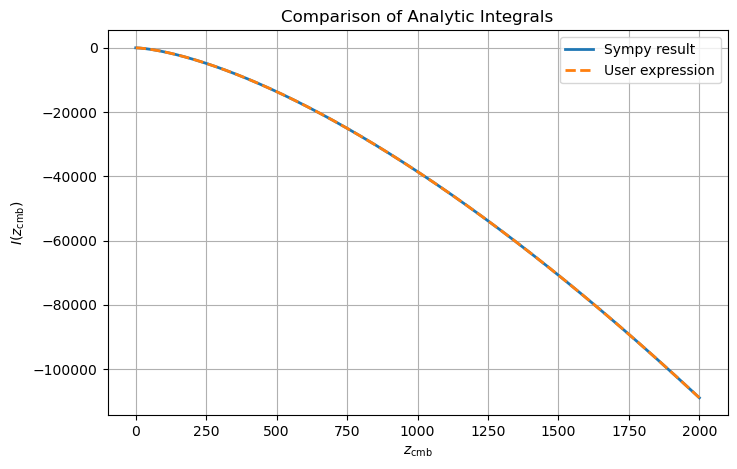